In [2]:
# Adding autoreload will let you edit your package and see the changes without restarting the notebook.
%load_ext autoreload
%autoreload 2

#imports
import sys
import pandas as pd
import matplotlib.pyplot as plt

#add main path to project paths
sys.path.insert(1, '../')

In [3]:
df = pd.read_json('../data/raw/sessions.jsonl', lines=True)
df

session_id           timestamp  user_id  product_id    event_type  \
0             124 2021-08-02 21:55:54      102        1318  VIEW_PRODUCT   
1             124 2021-08-02 21:56:51      102        1318   ADD_TO_CART   
2             124 2021-08-02 21:57:39      102        1318   BUY_PRODUCT   
3             125 2021-07-26 09:09:11      102        1005  VIEW_PRODUCT   
4             125 2021-07-26 09:11:13      102        1009  VIEW_PRODUCT   
...           ...                 ...      ...         ...           ...   
52103        9853 2021-06-30 09:06:55      301        1073  VIEW_PRODUCT   
52104        9853 2021-06-30 09:08:16      301        1073   ADD_TO_CART   
52105        9853 2021-06-30 09:09:53      301        1073   BUY_PRODUCT   
52106        9853 2021-06-30 09:09:53      301        1074   BUY_PRODUCT   
52107        9853 2021-06-30 09:09:53      301        1072   BUY_PRODUCT   

       offered_discount  purchase_id  
0                     0          NaN  
1                     0          NaN  
2                     0      20001.0  
3                    10          NaN  
4                    10          NaN  
...                 ...          ...  
52103                 0          NaN  
52104                 0          NaN  
52105                 0      23755.0  
52106                 0      23755.0  
52107                 0      23755.0  

[52108 rows x 7 columns]

In [4]:
purchase_df = df[['session_id', 'event_type']]
filter = purchase_df['event_type'] == "BUY_PRODUCT"
purchase_df = purchase_df[filter]
purchase_df = purchase_df.drop_duplicates()
purchase_df

session_id   event_type
2             124  BUY_PRODUCT
22            126  BUY_PRODUCT
26            127  BUY_PRODUCT
29            128  BUY_PRODUCT
47            131  BUY_PRODUCT
...           ...          ...
52065        9846  BUY_PRODUCT
52068        9847  BUY_PRODUCT
52077        9848  BUY_PRODUCT
52079        9849  BUY_PRODUCT
52105        9853  BUY_PRODUCT

[3755 rows x 2 columns]

False    5975
True     3755
Name: finished_with_purchase, dtype: int64

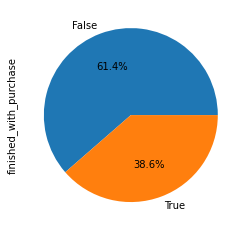

In [5]:

plt.figure().set_facecolor('white')

session_df = df[['session_id']].drop_duplicates()
session_df['finished_with_purchase'] = session_df['session_id'].isin(purchase_df['session_id'])
session_df['finished_with_purchase'].value_counts().plot.pie(autopct=lambda x: str(round(x, 1)) + "%")
session_df['finished_with_purchase'].value_counts()

In [6]:
cart_bought_df = df[['session_id', 'event_type']]
filter = ( cart_bought_df['event_type'] == "BUY_PRODUCT" ) | ( cart_bought_df['event_type'] == "ADD_TO_CART" )
cart_bought_df = cart_bought_df[filter]
cart_bought_df = cart_bought_df.drop_duplicates()
cart_bought_df

session_id   event_type
1             124  ADD_TO_CART
2             124  BUY_PRODUCT
6             125  ADD_TO_CART
16            126  ADD_TO_CART
22            126  BUY_PRODUCT
...           ...          ...
52081        9850  ADD_TO_CART
52095        9851  ADD_TO_CART
52097        9852  ADD_TO_CART
52100        9853  ADD_TO_CART
52105        9853  BUY_PRODUCT

[11461 rows x 2 columns]

In [7]:
filter = cart_bought_df['event_type'] == "BUY_PRODUCT" 
# purchase_df = purchase_df.drop(index=purchase_df[filter].index)
cart_bought_df['product_bought'] = cart_bought_df[filter]['event_type']
filter = cart_bought_df['event_type'] == "ADD_TO_CART" 
cart_bought_df['added_to_cart'] = cart_bought_df[filter]['event_type']
cart_bought_df = cart_bought_df.drop(columns=['event_type'])
cart_bought_df2 = cart_bought_df
cart_bought_df = cart_bought_df.groupby(['session_id']).aggregate({'session_id': 'first', 'product_bought': 'first', 'added_to_cart': 'last'})
filter = cart_bought_df['added_to_cart'].notna()
cart_bought_df = cart_bought_df[filter]
cart_bought_df

session_id product_bought added_to_cart
session_id                                         
124                124    BUY_PRODUCT   ADD_TO_CART
125                125           None   ADD_TO_CART
126                126    BUY_PRODUCT   ADD_TO_CART
127                127    BUY_PRODUCT   ADD_TO_CART
128                128    BUY_PRODUCT   ADD_TO_CART
...                ...            ...           ...
9848              9848    BUY_PRODUCT   ADD_TO_CART
9850              9850           None   ADD_TO_CART
9851              9851           None   ADD_TO_CART
9852              9852           None   ADD_TO_CART
9853              9853    BUY_PRODUCT   ADD_TO_CART

[7706 rows x 3 columns]

In [8]:
cart_bought_df2

session_id product_bought added_to_cart
1             124            NaN   ADD_TO_CART
2             124    BUY_PRODUCT           NaN
6             125            NaN   ADD_TO_CART
16            126            NaN   ADD_TO_CART
22            126    BUY_PRODUCT           NaN
...           ...            ...           ...
52081        9850            NaN   ADD_TO_CART
52095        9851            NaN   ADD_TO_CART
52097        9852            NaN   ADD_TO_CART
52100        9853            NaN   ADD_TO_CART
52105        9853    BUY_PRODUCT           NaN

[11461 rows x 3 columns]

False    4687
True     3019
Name: finished_with_purchase, dtype: int64

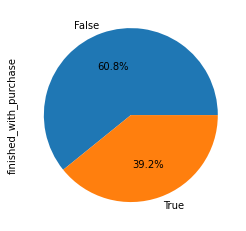

In [9]:
plt.figure().set_facecolor('white')
cart_bought_df['finished_with_purchase'] = cart_bought_df['session_id'].isin(purchase_df['session_id'])
cart_bought_df['finished_with_purchase'].value_counts().plot.pie(autopct=lambda x: str(round(x, 1)) + "%")
cart_bought_df['finished_with_purchase'].value_counts()

In [10]:
product_cart_bought_df = df[['session_id', 'event_type', 'product_id']]
# filter = ( cart_bought_df['event_type'] == "BUY_PRODUCT" ) | ( cart_bought_df['event_type'] == "ADD_TO_CART" )
# cart_bought_df = cart_bought_df[filter]
product_cart_bought_df = product_cart_bought_df.drop_duplicates()
filter = product_cart_bought_df['event_type'] == "BUY_PRODUCT" 
product_cart_bought_df['product_bought'] = product_cart_bought_df[filter]['event_type']
filter = product_cart_bought_df['event_type'] == "ADD_TO_CART" 
product_cart_bought_df['added_to_cart'] = product_cart_bought_df[filter]['event_type']
product_cart_bought_df = product_cart_bought_df.drop(columns=['event_type'])

product_cart_bought_df = product_cart_bought_df.groupby(['session_id', 'product_id']).aggregate({'session_id': 'first', 'product_id' : 'first', 'product_bought': 'first', 'added_to_cart': 'first'})

filter = product_cart_bought_df['added_to_cart'].notna() | product_cart_bought_df['product_bought'].notna()
product_cart_bought_df = product_cart_bought_df[filter]

filter = product_cart_bought_df['added_to_cart'].notna()
product_cart_bought_df = product_cart_bought_df[filter]


product_cart_bought_df['product_bought'] = product_cart_bought_df['product_bought'] == 'BUY_PRODUCT'

product_cart_bought_df

session_id  product_id  product_bought added_to_cart
session_id product_id                                                      
124        1318               124        1318            True   ADD_TO_CART
125        1007               125        1007           False   ADD_TO_CART
           1011               125        1011           False   ADD_TO_CART
126        1025               126        1025            True   ADD_TO_CART
           1034               126        1034            True   ADD_TO_CART
...                           ...         ...             ...           ...
9851       1318              9851        1318           False   ADD_TO_CART
9852       1276              9852        1276           False   ADD_TO_CART
9853       1072              9853        1072            True   ADD_TO_CART
           1073              9853        1073            True   ADD_TO_CART
           1074              9853        1074            True   ADD_TO_CART

[15700 rows x 4 columns]

False    10280
True      5420
Name: product_bought, dtype: int64

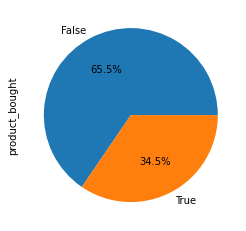

In [11]:
plt.figure().set_facecolor('white')
# product_cart_bought_df['finished_with_purchase'] = product_cart_bought_df['session_id'].isin(product_cart_bought_df[product_cart_bought_df['product_bought']])
product_cart_bought_df['product_bought'].value_counts().plot.pie(autopct=lambda x: str(round(x, 1)) + "%")
product_cart_bought_df['product_bought'].value_counts()

In [12]:
product_bought_df = df[['session_id', 'event_type', 'product_id']]
product_bought_df = product_bought_df.drop_duplicates()

filter = product_bought_df['event_type'] == "BUY_PRODUCT" 
product_bought_df['product_bought'] = product_bought_df[filter]['event_type']

filter = product_bought_df['event_type'] == "VIEW_PRODUCT" 
product_bought_df['product_viewed'] = product_bought_df[filter]['event_type']

product_bought_df = product_bought_df.drop(columns=['event_type'])

product_bought_df = product_bought_df.groupby(['session_id', 'product_id']).aggregate({'session_id': 'first', 'product_id' : 'first', 'product_bought': 'first', 'product_viewed': 'first'})

filter = product_bought_df['product_viewed'].notna() | product_bought_df['product_bought'].notna()
product_bought_df = product_bought_df[filter]

filter = product_bought_df['product_viewed'].notna()
product_bought_df = product_bought_df[filter]


product_bought_df['product_bought'] = product_bought_df['product_bought'] == 'BUY_PRODUCT'

product_bought_df

session_id  product_id  product_bought product_viewed
session_id product_id                                                       
124        1318               124        1318            True   VIEW_PRODUCT
125        1004               125        1004           False   VIEW_PRODUCT
           1005               125        1005           False   VIEW_PRODUCT
           1007               125        1007           False   VIEW_PRODUCT
           1009               125        1009           False   VIEW_PRODUCT
...                           ...         ...             ...            ...
9852       1276              9852        1276           False   VIEW_PRODUCT
           1277              9852        1277           False   VIEW_PRODUCT
9853       1072              9853        1072            True   VIEW_PRODUCT
           1073              9853        1073            True   VIEW_PRODUCT
           1074              9853        1074            True   VIEW_PRODUCT

[30252 rows x 4 columns]

False    24096
True      6156
Name: product_bought, dtype: int64

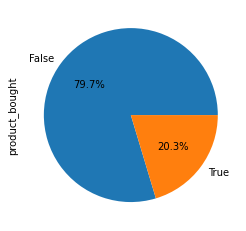

In [13]:
plt.figure().set_facecolor('white')
# product_cart_bought_df['finished_with_purchase'] = product_cart_bought_df['session_id'].isin(product_cart_bought_df[product_cart_bought_df['product_bought']])
product_bought_df['product_bought'].value_counts().plot.pie(autopct=lambda x: str(round(x, 1)) + "%")
product_bought_df['product_bought'].value_counts()

Warszawa    39
Radom       30
Kraków      29
Poznań      28
Wrocław     25
Gdynia      25
Szczecin    24
Name: city, dtype: int64

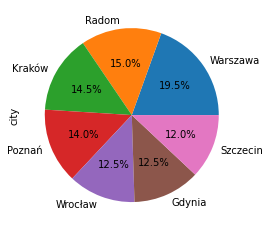

In [14]:
df1 = pd.read_json('../data/raw/users.jsonl', lines=True)
users_city_df = df1[['user_id', 'city']]
users_city_df

plt.figure().set_facecolor('white')
users_city_df['city'].value_counts().plot.pie(autopct=lambda x: str(round(x, 1)) + "%")
users_city_df['city'].value_counts()

In [15]:
corelation_df = df[['session_id', 'event_type', 'product_id']]
corelation_df = corelation_df.drop_duplicates()

filter = corelation_df['event_type'] == "BUY_PRODUCT" 
corelation_df['product_bought'] = corelation_df[filter]['event_type']

filter = corelation_df['event_type'] == "ADD_TO_CART" 
corelation_df['added_to_cart'] = corelation_df[filter]['event_type']

corelation_df = corelation_df.drop(columns=['event_type'])

corelation_df = corelation_df.groupby(['session_id', 'product_id']).aggregate({'session_id': 'first', 'product_id' : 'first', 'product_bought': 'first', 'added_to_cart': 'first'})

corelation_df['product_bought'] = corelation_df['product_bought'] == 'BUY_PRODUCT'
corelation_df['added_to_cart'] = corelation_df['added_to_cart'] == 'ADD_TO_CART'


corelation = corelation_df['product_bought'].corr(corelation_df['added_to_cart'])

corelation
# corelation_df

0.3656701236943934

In [16]:
product_discounted_df = df[['session_id', 'event_type', 'product_id', 'offered_discount']]
product_discounted_df = product_discounted_df.drop_duplicates()

filter = product_discounted_df['event_type'] == "BUY_PRODUCT" 
product_discounted_df['product_bought'] = product_discounted_df[filter]['event_type']
 
product_discounted_df['offered_discount'] = product_discounted_df['offered_discount'] > 0

product_discounted_df = product_discounted_df.drop(columns=['event_type'])

product_discounted_df = product_discounted_df.groupby(['session_id']).aggregate({'session_id': 'first', 'product_id' : 'first', 'product_bought': 'first', 'offered_discount': 'first'})

filter = product_discounted_df['offered_discount'] == True
product_discounted_df = product_discounted_df[filter]

product_discounted_df['product_bought'] = product_discounted_df['product_bought'] == 'BUY_PRODUCT'

product_discounted_df

# był oferowany discount i jak zakończłą się sesja - kupnem czy sprzedażą?

session_id  product_id  product_bought  offered_discount
session_id                                                          
125                125        1005           False              True
126                126        1017            True              True
128                128        1283            True              True
129                129        1290           False              True
130                130        1050           False              True
...                ...         ...             ...               ...
9840              9840        1078            True              True
9843              9843        1044           False              True
9844              9844        1080            True              True
9849              9849        1283            True              True
9850              9850        1288           False              True

[3936 rows x 4 columns]

False    2406
True     1530
Name: product_bought, dtype: int64

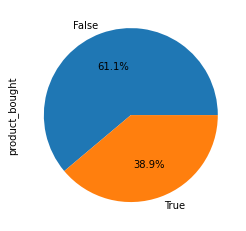

In [17]:
plt.figure().set_facecolor('white')
product_discounted_df['product_bought'].value_counts().plot.pie(autopct=lambda x: str(round(x, 1)) + "%")
product_discounted_df['product_bought'].value_counts()

In [18]:
city_bought_df = df[['session_id', 'event_type', 'product_id', 'user_id']]
city_bought_df = city_bought_df.drop_duplicates()


city_bought_df['event_type'] = city_bought_df['event_type'] == 'BUY_PRODUCT'

city_bought_df = city_bought_df.rename(columns={'event_type' : 'product_bought'})

# # product_discounted_df = product_discounted_df.drop(columns=['event_type'])

city_bought_df = city_bought_df.groupby(['session_id']).aggregate({'session_id': 'first', 'product_bought': 'max', 'user_id': 'first'})

users_city_df
city_bought_df = city_bought_df.merge(users_city_df, on='user_id', how='left')
city_bought_df = city_bought_df.drop(columns=['user_id'])
filter = product_discounted_df['offered_discount'] == True
product_discounted_df = product_discounted_df[filter]

# product_discounted_df['product_bought'] = product_discounted_df['product_bought'] == 'BUY_PRODUCT'

city_bought_df
# city_bought_df['user_id'] = users_city_df.loc[city_bought_df['user_id'].index, 'city']


session_id  product_bought      city
0            124            True  Warszawa
1            125           False  Warszawa
2            126            True  Warszawa
3            127            True  Warszawa
4            128            True  Warszawa
...          ...             ...       ...
9725        9849            True     Radom
9726        9850           False     Radom
9727        9851           False     Radom
9728        9852           False     Radom
9729        9853            True     Radom

[9730 rows x 3 columns]

In [19]:
filter = city_bought_df['city'] == "Warszawa" 
warszawa_df = city_bought_df[filter]

filter = city_bought_df['city'] == "Szczecin" 
szczecin_df = city_bought_df[filter]

filter = city_bought_df['city'] == "Gdynia" 
gdynia_df = city_bought_df[filter]

filter = city_bought_df['city'] == "Wrocław" 
wroclaw_df = city_bought_df[filter]

filter = city_bought_df['city'] == "Poznań" 
poznan_df = city_bought_df[filter]

filter = city_bought_df['city'] == "Kraków" 
krakow_df = city_bought_df[filter]

filter = city_bought_df['city'] == "Radom" 
radom_df = city_bought_df[filter]

False    1314
True      614
Name: product_bought, dtype: int64

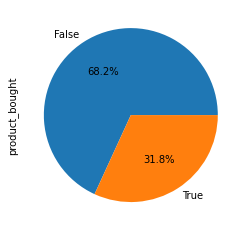

In [20]:
plt.figure().set_facecolor('white')
warszawa_df['product_bought'].value_counts().plot.pie(autopct=lambda x: str(round(x, 1)) + "%")
warszawa_df['product_bought'].value_counts()

False    863
True     402
Name: product_bought, dtype: int64

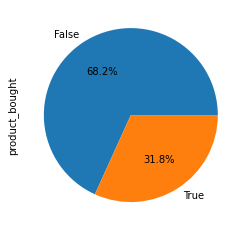

In [21]:
plt.figure().set_facecolor('white')
szczecin_df['product_bought'].value_counts().plot.pie(autopct=lambda x: str(round(x, 1)) + "%")
szczecin_df['product_bought'].value_counts()

False    886
True     424
Name: product_bought, dtype: int64

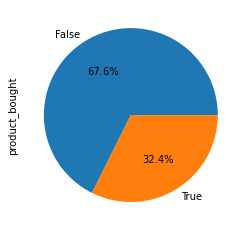

In [22]:
plt.figure().set_facecolor('white')
gdynia_df['product_bought'].value_counts().plot.pie(autopct=lambda x: str(round(x, 1)) + "%")
gdynia_df['product_bought'].value_counts()

False    554
True     507
Name: product_bought, dtype: int64

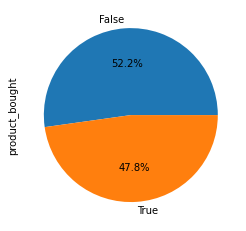

In [23]:
plt.figure().set_facecolor('white')
wroclaw_df['product_bought'].value_counts().plot.pie(autopct=lambda x: str(round(x, 1)) + "%")
wroclaw_df['product_bought'].value_counts()

False    691
True     314
Name: product_bought, dtype: int64

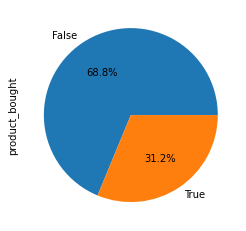

In [24]:
plt.figure().set_facecolor('white')
poznan_df['product_bought'].value_counts().plot.pie(autopct=lambda x: str(round(x, 1)) + "%")
poznan_df['product_bought'].value_counts()

False    727
True     689
Name: product_bought, dtype: int64

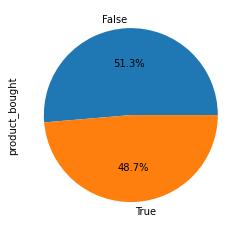

In [25]:
plt.figure().set_facecolor('white')
krakow_df['product_bought'].value_counts().plot.pie(autopct=lambda x: str(round(x, 1)) + "%")
krakow_df['product_bought'].value_counts()

False    940
True     805
Name: product_bought, dtype: int64

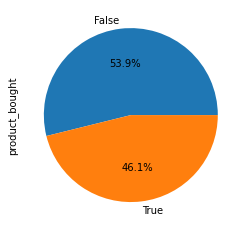

In [26]:
plt.figure().set_facecolor('white')
radom_df['product_bought'].value_counts().plot.pie(autopct=lambda x: str(round(x, 1)) + "%")
radom_df['product_bought'].value_counts()

In [27]:
product_price_df = pd.read_json('../data/raw/sessions.jsonl', lines=True)
product_price_df = product_price_df[['session_id', 'event_type', 'product_id']]
product_price_df

session_id    event_type  product_id
0             124  VIEW_PRODUCT        1318
1             124   ADD_TO_CART        1318
2             124   BUY_PRODUCT        1318
3             125  VIEW_PRODUCT        1005
4             125  VIEW_PRODUCT        1009
...           ...           ...         ...
52103        9853  VIEW_PRODUCT        1073
52104        9853   ADD_TO_CART        1073
52105        9853   BUY_PRODUCT        1073
52106        9853   BUY_PRODUCT        1074
52107        9853   BUY_PRODUCT        1072

[52108 rows x 3 columns]

In [28]:
products_df = pd.read_json('../data/raw/products.jsonl', lines=True)
products_df = products_df[['product_id', 'price']]
products_df = products_df.set_index('product_id')
products_df

price
product_id         
1001          58.97
1002        2048.50
1003        7639.00
1004          49.99
1005          49.99
...             ...
1315          54.99
1316         249.00
1317        1303.96
1318         553.00
1319          14.99

[319 rows x 1 columns]

In [29]:
temp = products_df.loc[product_price_df['product_id']]['price']
temp = temp.reset_index()
product_price_df['price'] = temp['price']
product_price_df

session_id    event_type  product_id   price
0             124  VIEW_PRODUCT        1318  553.00
1             124   ADD_TO_CART        1318  553.00
2             124   BUY_PRODUCT        1318  553.00
3             125  VIEW_PRODUCT        1005   49.99
4             125  VIEW_PRODUCT        1009   69.00
...           ...           ...         ...     ...
52103        9853  VIEW_PRODUCT        1073  129.00
52104        9853   ADD_TO_CART        1073  129.00
52105        9853   BUY_PRODUCT        1073  129.00
52106        9853   BUY_PRODUCT        1074   86.28
52107        9853   BUY_PRODUCT        1072  299.00

[52108 rows x 4 columns]

In [30]:
filter = product_price_df['event_type'] == "BUY_PRODUCT" 
product_price_df['product_bought'] = product_price_df[filter]['event_type']
filter = product_price_df['event_type'] == "VIEW_PRODUCT" 
product_price_df['product_viewd'] = product_price_df[filter]['event_type']
product_price_df = product_price_df.drop(columns=['event_type'])
product_price_df = product_price_df.groupby(['session_id', 'product_id']).aggregate({'session_id': 'first', 'product_id' : 'first', 'product_bought': 'first', 'product_viewd': 'first', 'price': 'first'})
filter = product_price_df['product_viewd'].notna() | product_price_df['product_bought'].notna()
product_price_df = product_price_df[filter]
product_price_df['product_bought'] = product_price_df['product_bought'] == 'BUY_PRODUCT'
product_price_df

session_id  product_id  product_bought product_viewd  \
session_id product_id                                                         
124        1318               124        1318            True  VIEW_PRODUCT   
125        1004               125        1004           False  VIEW_PRODUCT   
           1005               125        1005           False  VIEW_PRODUCT   
           1007               125        1007           False  VIEW_PRODUCT   
           1009               125        1009           False  VIEW_PRODUCT   
...                           ...         ...             ...           ...   
9852       1276              9852        1276           False  VIEW_PRODUCT   
           1277              9852        1277           False  VIEW_PRODUCT   
9853       1072              9853        1072            True  VIEW_PRODUCT   
           1073              9853        1073            True  VIEW_PRODUCT   
           1074              9853        1074            True  VIEW_PRODUCT   

                         price  
session_id product_id           
124        1318         553.00  
125        1004          49.99  
           1005          49.99  
           1007          89.99  
           1009          69.00  
...                        ...  
9852       1276        1816.97  
           1277        2317.02  
9853       1072         299.00  
           1073         129.00  
           1074          86.28  

[30252 rows x 5 columns]

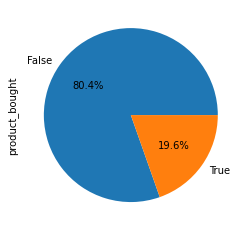

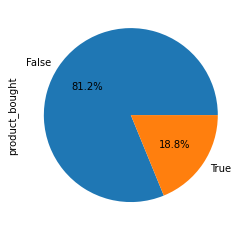

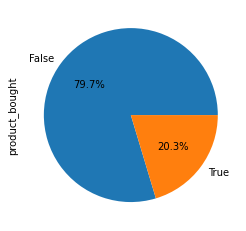

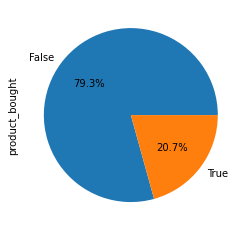

In [31]:
price_bracket1 = (product_price_df['price'] < 100) | (product_price_df['price'] == 100)
price_bracket2 = (product_price_df['price'] > 100) & ((product_price_df['price'] < 200) | (product_price_df['price'] == 200))
price_bracket3 = product_price_df['price'] > 200 & ((product_price_df['price'] < 1000) | (product_price_df['price'] == 1000))
price_bracket4 = product_price_df['price'] > 1000

for bracket in [price_bracket1, price_bracket2, price_bracket3, price_bracket4]:
    plt.figure().set_facecolor('white')
    product_price_df[bracket]['product_bought'].value_counts().plot.pie(autopct=lambda x: str(round(x, 1)) + "%")
    product_price_df[bracket]['product_bought'].value_counts()